## 초기환경설정 및 라이브러리 로딩(import convention)

In [110]:
#import 컨벤션
%matplotlib inline

In [111]:
import pandas as pd # panel data & python data analysis ==> DataFrame과 Series 객체를 다루는 주요 모듈
import numpy as np # Numerical Python 고성능의 수치 계산 ==> ndarray N차원 배열객체

In [112]:
import matplotlib.pyplot as plt
from scipy import stats
from random import randint

## 데이터 준비

In [113]:
# abc.csv 파일 메모리로 로딩
abc = pd.read_csv('abc.csv', skipinitialspace=True)

In [114]:
# abc 데이터프레임의 변수컬럼 확인
abc.head(5)

,gender,job,age,position,address,total,check,price,survey
0,1,1.0,26.0,2.0,Seoul,66.3,5.0,5.1,3.0
1,1,2.0,54.0,5.0,Busan,63.7,NaN,NaN,NaN
2,1,2.0,41.0,4.0,NaN,61.1,5.0,4.7,2.0
3,2,NaN,45.0,4.0,Gwangju,59.8,7.0,NaN,NaN
4,1,3.0,70.0,5.0,Suwon,650.0,5.0,5.0,4.0


In [115]:
# abc 데이터프레임의 범주형 변수(Categorical Variables: cateV)만 별도로 인덱싱 실시
cateV = abc[['gender','job','position','address']]
cateV.head()

,gender,job,position,address
0,1,1.0,2.0,Seoul
1,1,2.0,5.0,Busan
2,1,2.0,4.0,NaN
3,2,NaN,4.0,Gwangju
4,1,3.0,5.0,Suwon


In [116]:
# abc 데이터프레임의 연속형 변수(Categorical Variables: cateV)만 별도로 인덱싱 실시
contV = abc.drop(['gender','job','position','address'], axis=1) # 앞서작업한 범주형 변수목록을 활용한 여집합 선별방식
contV.head()

,age,total,check,price,survey
0,26.0,66.3,5.0,5.1,3.0
1,54.0,63.7,NaN,NaN,NaN
2,41.0,61.1,5.0,4.7,2.0
3,45.0,59.8,7.0,NaN,NaN
4,70.0,650.0,5.0,5.0,4.0


## zscore를 활용한 비율척도 변수의 표준화 및 이상치 탐색

In [117]:
contV.describe()

,age,total,check,price,survey
count,134.000000,150.000000,139.000000,90.000000,93.000000
mean,44.141791,79.508000,4.330935,15.211111,3.107527
std,14.926967,49.453207,3.288955,94.985705,0.840062
min,20.000000,5.000000,-5.000000,-345.600000,1.000000
25%,30.000000,66.300000,2.500000,4.925000,3.000000
50%,44.000000,75.400000,4.000000,5.700000,3.000000
75%,56.750000,83.200000,5.000000,6.400000,3.000000
max,70.000000,650.000000,14.000000,675.000000,5.000000


In [118]:
contV.head(10)

,age,total,check,price,survey
0,26.0,66.3,5.0,5.1,3.0
1,54.0,63.7,NaN,NaN,NaN
2,41.0,61.1,5.0,4.7,2.0
3,45.0,59.8,7.0,NaN,NaN
4,70.0,650.0,5.0,5.0,4.0
5,57.0,70.2,7.0,5.4,5.0
6,36.0,59.8,5.0,NaN,NaN
7,NaN,65.0,12.0,675.0,3.0
8,56.0,57.2,3.0,4.4,4.0
9,37.0,63.7,4.0,4.9,3.0


In [119]:
# scypy모듈중에서 통계분석 관련 stats서브모듈의 기능함수들 중에서 zscore함수를 별도로 로딩함
from scipy.stats import zscore

In [120]:
# price 변수에 대한 표준화
contV.price[contV.price.notnull()]  = zscore(contV.price[contV.price.notnull()])
contV.head(10)

,age,total,check,price,survey
0,26.0,66.3,5.0,-0.107045,3.0
1,54.0,63.7,NaN,NaN,NaN
2,41.0,61.1,5.0,-0.111280,2.0
3,45.0,59.8,7.0,NaN,NaN
4,70.0,650.0,5.0,-0.108104,4.0
5,57.0,70.2,7.0,-0.103869,5.0
6,36.0,59.8,5.0,NaN,NaN
7,NaN,65.0,12.0,6.985106,3.0
8,56.0,57.2,3.0,-0.114456,4.0
9,37.0,63.7,4.0,-0.109162,3.0


In [121]:
# total 변수에 대한 표준화
contV.total[contV.total.notnull()]  = zscore(contV.total[contV.total.notnull()])
contV.head(10)

,age,total,check,price,survey
0,26.0,-0.267976,5.0,-0.107045,3.0
1,54.0,-0.320727,NaN,NaN,NaN
2,41.0,-0.373478,5.0,-0.111280,2.0
3,45.0,-0.399853,7.0,NaN,NaN
4,70.0,11.574643,5.0,-0.108104,4.0
5,57.0,-0.188849,7.0,-0.103869,5.0
6,36.0,-0.399853,5.0,NaN,NaN
7,NaN,-0.294351,12.0,6.985106,3.0
8,56.0,-0.452604,3.0,-0.114456,4.0
9,37.0,-0.320727,4.0,-0.109162,3.0


In [122]:
# 표준화처리된 price 변수의 절대값이 3보다 큰 경우를 찾아라
# 보통 (+-)3시그마 보다 큰 수치들은 이상치로 간주
contV["out_price"] = abs(contV.price) > 3    # 파생변수 추가
contV.head()

,age,total,check,price,survey,out_price
0,26.0,-0.267976,5.0,-0.107045,3.0,False
1,54.0,-0.320727,NaN,NaN,NaN,False
2,41.0,-0.373478,5.0,-0.111280,2.0,False
3,45.0,-0.399853,7.0,NaN,NaN,False
4,70.0,11.574643,5.0,-0.108104,4.0,False


In [123]:
# 표준화처리된 total 변수의 값이 3보다 큰 경우를 찾아라
# 보통 (+-)3시그마 보다 큰 수치들은 이상치로 간주
contV["out_total"] = abs(contV.total) > 3    # 파생변수 추가
contV.head()

,age,total,check,price,survey,out_price,out_total
0,26.0,-0.267976,5.0,-0.107045,3.0,False,False
1,54.0,-0.320727,NaN,NaN,NaN,False,False
2,41.0,-0.373478,5.0,-0.111280,2.0,False,False
3,45.0,-0.399853,7.0,NaN,NaN,False,False
4,70.0,11.574643,5.0,-0.108104,4.0,False,True


In [124]:
# 표준화처리된 total 또는 price 변수의 값이 3시그마를 벗어난 관찰치 파악
contV[(contV.out_price == True) | (contV.out_total.values == True)]

,age,total,check,price,survey,out_price,out_total
4,70.0,11.574643,5.0,-0.108104,4.0,False,True
7,NaN,-0.294351,12.0,6.985106,3.0,True,False
64,70.0,-0.136098,1.0,-3.819864,3.0,True,False
147,63.0,0.101282,7.0,3.401447,5.0,True,False


In [125]:
# 3시그마 이상의 표준편차 차이를 보이고 있는 4, 7, 64, 147 관찰치 제거
contV2 = contV.drop([4, 7, 64, 147])
contV2.head(10) # 4, 7번 관찰치 제거됐음을 확인

,age,total,check,price,survey,out_price,out_total
0,26.0,-0.267976,5.0,-0.107045,3.0,False,False
1,54.0,-0.320727,NaN,NaN,NaN,False,False
2,41.0,-0.373478,5.0,-0.111280,2.0,False,False
3,45.0,-0.399853,7.0,NaN,NaN,False,False
5,57.0,-0.188849,7.0,-0.103869,5.0,False,False
6,36.0,-0.399853,5.0,NaN,NaN,False,False
8,56.0,-0.452604,3.0,-0.114456,4.0,False,False
9,37.0,-0.320727,4.0,-0.109162,3.0,False,False
10,29.0,-0.188849,5.0,NaN,NaN,False,False
11,35.0,-0.347102,NaN,NaN,NaN,False,False


In [79]:
contV2[60:65] # 64번 관찰치 제거됐음을 확인

,age,total,check,price,survey,out_price,out_total
62,NaN,-0.030596,4.0,-0.097517,2.0,False,False
63,28.0,-0.004220,-5.0,-0.126102,3.0,False,False
65,24.0,0.154033,4.0,NaN,NaN,False,False
66,62.0,-0.136098,3.0,-0.101752,3.0,False,False
67,62.0,-0.083347,1.0,NaN,NaN,False,False


In [126]:
contV2.tail() # 147번 관찰치 제거됐음을 확인

,age,total,check,price,survey,out_price,out_total
144,60.0,0.154033,4.0,-0.090106,3.0,False,False
145,38.0,0.154033,2.0,-0.103869,4.0,False,False
146,NaN,0.048531,12.0,NaN,NaN,False,False
148,41.0,0.022155,-1.0,-0.095400,4.0,False,False
149,27.0,-0.056971,4.0,-0.098576,3.0,False,False


## 등간(간격) 척도변수의 이상치 탐색

In [129]:
# 등간(간격)척도로 측정된 check 변수의 raw데이터 현황
# 1점: 매우 불만족, 2점: 불만족, 3점: 보통, 4점: 만족, 5점: 매우만족
contV.check.head(10)

0     5.0
1     NaN
2     5.0
3     7.0
4     5.0
5     7.0
6     5.0
7    12.0
8     3.0
9     4.0
Name: check, dtype: float64

In [130]:
# check 변수에 들어 있는 raw데이터 항목별로 빈도수를 체크함
# 가장 발생빈도가 많은 순서대로 내림차순 정렬됨
contV.check.value_counts()

 4.0     41
 3.0     21
 2.0     20
 5.0     15
 12.0    12
 1.0     11
 7.0      9
 8.0      2
-4.0      2
-1.0      1
 9.0      1
 6.0      1
 14.0     1
-5.0      1
 11.0     1
Name: check, dtype: int64

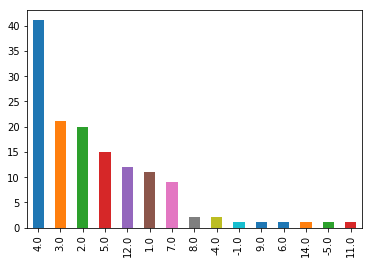

In [138]:
# check 변수에 들어 있는 raw데이터 항목별로 빈도수를 막대그래프로 표현
contV.check.value_counts().plot(kind='bar')

In [142]:
# check 변수에 들어 있는 raw데이터 항목별로 빈도수를 체크함
# 보기항목을 기준으로 정렬함 
contV.check.value_counts()
contV.check.value_counts(sort=False, ascending=True)

 5.0     15
 7.0      9
 12.0    12
 3.0     21
 4.0     41
-4.0      2
 2.0     20
 1.0     11
 11.0     1
 8.0      2
-5.0      1
 14.0     1
 6.0      1
 9.0      1
-1.0      1
Name: check, dtype: int64

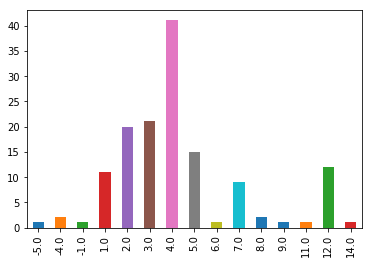

In [150]:
# check 변수에 들어 있는 raw데이터 항목별로 빈도수를 막대그래프로 표현
# 별도의 가이드라인을 통해서 이상치범위를 명확하게 표시함
contV.check.value_counts(sort=False, ascending=True).sort_index(ascending=True).plot(kind='bar')


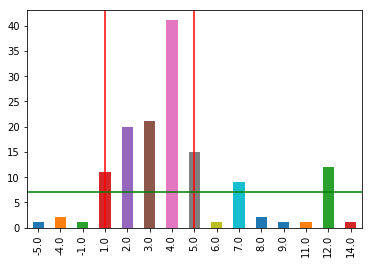

In [153]:
# check 변수에 들어 있는 raw데이터 항목별로 빈도수를 막대그래프로 표현
# 별도의 가이드라인을 통해서 이상치범위를 명확하게 표시함
contV.check.value_counts(sort=False, ascending=True).sort_index(ascending=True).plot(kind='bar')
plt.axvline(3, color='r')
plt.axvline(7, color='r')
plt.axhline(7, color='g')

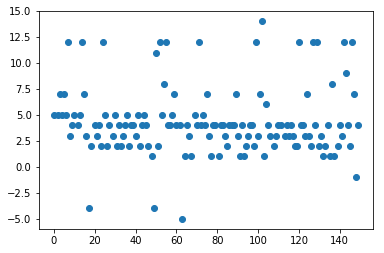

In [154]:
# 산포도를 이용한 check 변수의 이상치 탐색
plt.scatter(contV.check.index, contV.check)


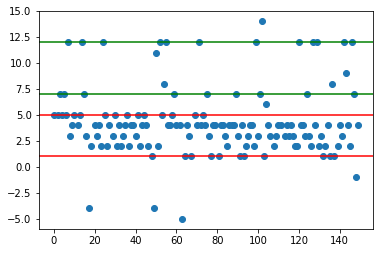

In [88]:
# 산포도를 이용한 check 변수의 이상치 탐색
plt.scatter(contV.check.index,contV.check)
plt.axhline(1, color='r')
plt.axhline(5, color='r')

plt.axhline(7, color='g')
plt.axhline(12, color='g')

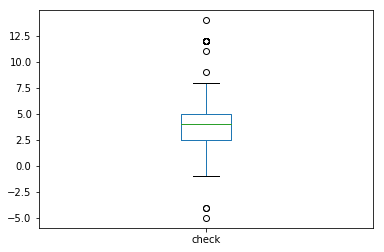

In [183]:
# 박스플롯을이용한 check 변수의 이상치 탐색
contV.check.plot(kind='box')

In [156]:
# 1점~5점까지의 시그널 데이터 범위를 별도로 선택/추출함
contV3 = contV[(contV.check <= 5) & (contV.check >= 1)]
contV3.head(10)

,age,total,check,price,survey,out_price,out_total
0,26.0,-0.267976,5.0,-0.107045,3.0,False,False
2,41.0,-0.373478,5.0,-0.111280,2.0,False,False
4,70.0,11.574643,5.0,-0.108104,4.0,False,True
6,36.0,-0.399853,5.0,NaN,NaN,False,False
8,56.0,-0.452604,3.0,-0.114456,4.0,False,False
9,37.0,-0.320727,4.0,-0.109162,3.0,False,False
10,29.0,-0.188849,5.0,NaN,NaN,False,False
12,56.0,-0.347102,4.0,NaN,NaN,False,False
13,20.0,-0.478980,5.0,-0.115515,1.0,False,False
16,49.0,-0.188849,3.0,NaN,NaN,False,False


In [168]:
# check 변수의 raw데이터 중에서 이상패턴이 상대적으로 많았던 7번, 12번 응답차 별도 선택/추출
contV4 = contV[(contV.check == 7) | (contV.check == 12)]
contV4.head(10)

,age,total,check,price,survey,out_price,out_total
3,45.0,-0.399853,7.0,NaN,NaN,False,False
5,57.0,-0.188849,7.0,-0.103869,5.0,False,False
7,NaN,-0.294351,12.0,6.985106,3.0,True,False
14,63.0,-0.083347,12.0,2.229479,4.0,False,False
15,49.0,-0.109722,7.0,-0.100693,3.0,False,False
24,30.0,-0.347102,12.0,-0.211855,3.0,False,False
52,70.0,0.206784,12.0,NaN,NaN,False,False
55,22.0,-0.109722,12.0,-0.111280,3.0,False,False
59,36.0,-0.241600,7.0,-0.117632,3.0,False,False
71,26.0,-0.004220,12.0,-0.125043,3.0,False,False


In [169]:
# check 변수의 raw데이터 중에서 이상패턴이 상대적으로 많았던 7번, 12번 응답차 별도 선택/추출
contV4.sort_values(['check'], ascending=1)

,age,total,check,price,survey,out_price,out_total
3,45.0,-0.399853,7.0,NaN,NaN,False,False
124,51.0,0.154033,7.0,-0.090106,3.0,False,False
101,68.0,-0.083347,7.0,NaN,NaN,False,False
89,38.0,-0.162473,7.0,NaN,NaN,False,False
59,36.0,-0.241600,7.0,-0.117632,3.0,False,False
75,43.0,0.127658,7.0,-0.129278,3.0,False,False
15,49.0,-0.109722,7.0,-0.100693,3.0,False,False
5,57.0,-0.188849,7.0,-0.103869,5.0,False,False
147,63.0,0.101282,7.0,3.401447,5.0,True,False
52,70.0,0.206784,12.0,NaN,NaN,False,False


## 결측값이 한개라도 있는 행을 제거

In [170]:
# abc 데이터프레임의 각 변수컬럼에 결측값이 존배하면 해당 레코드/관찰치는 제거됨
abc_clean = abc.dropna()

In [171]:
abc_clean.head(10)

,gender,job,age,position,address,total,check,price,survey
0,1,1.0,26.0,2.0,Seoul,66.3,5.0,5.1,3.0
4,1,3.0,70.0,5.0,Suwon,650.0,5.0,5.0,4.0
9,1,2.0,37.0,3.0,Busan,63.7,4.0,4.9,3.0
13,2,3.0,20.0,1.0,Busan,55.9,5.0,4.3,1.0
15,1,1.0,49.0,4.0,Seoul,74.1,7.0,5.7,3.0
17,1,3.0,49.0,4.0,Busan,66.3,-4.0,5.1,3.0
21,1,3.0,21.0,1.0,Seoul,66.3,3.0,5.1,2.0
23,1,2.0,63.0,5.0,Seoul,66.3,2.0,4.1,5.0
24,1,1.0,30.0,2.0,Seoul,62.4,12.0,-4.8,3.0
26,1,1.0,26.0,2.0,Seoul,65.0,2.0,5.0,3.0


In [172]:
# 특정한 작업결과에 따라 레코드(관찰치)의 인덱스번호가 뒤죽박죽일 때 이를 안정적인 연속번호로 리셋시켜줌
abc_clean.reset_index().head(10)

,index,gender,job,age,position,address,total,check,price,survey
0,0,1,1.0,26.0,2.0,Seoul,66.3,5.0,5.1,3.0
1,4,1,3.0,70.0,5.0,Suwon,650.0,5.0,5.0,4.0
2,9,1,2.0,37.0,3.0,Busan,63.7,4.0,4.9,3.0
3,13,2,3.0,20.0,1.0,Busan,55.9,5.0,4.3,1.0
4,15,1,1.0,49.0,4.0,Seoul,74.1,7.0,5.7,3.0
5,17,1,3.0,49.0,4.0,Busan,66.3,-4.0,5.1,3.0
6,21,1,3.0,21.0,1.0,Seoul,66.3,3.0,5.1,2.0
7,23,1,2.0,63.0,5.0,Seoul,66.3,2.0,4.1,5.0
8,24,1,1.0,30.0,2.0,Seoul,62.4,12.0,-4.8,3.0
9,26,1,1.0,26.0,2.0,Seoul,65.0,2.0,5.0,3.0


## 특정 변수의 NA의 행을 제거

In [173]:
# abc 데이터프레임에서 price변수컬럼 데이터를 별로로 추출한 다음, 결측치 유무를 판단
abc.price.notnull().head(10) # .notnull() 메소드 사용

0     True
1    False
2     True
3    False
4     True
5     True
6    False
7     True
8     True
9     True
Name: price, dtype: bool

In [174]:
# abc 데이터프레임에서 price변수컬럼 데이터를 별로로 추출한 다음, 결측치 유무를 판단
abc.price.isnull().head(10) # .isnull() 메소드 사용

0    False
1     True
2    False
3     True
4    False
5    False
6     True
7    False
8    False
9    False
Name: price, dtype: bool

In [175]:
# abc 데이터프레임의 price변수컬럼에서 결측치가 아닌 정상데이터를 보유한 관찰치/레코드를 추출
# 뒤죽박죽인 인덱스번호를 리셋시켜줌
abc[abc.price.notnull()].reset_index().head(10)

,index,gender,job,age,position,address,total,check,price,survey
0,0,1,1.0,26.0,2.0,Seoul,66.3,5.0,5.1,3.0
1,2,1,2.0,41.0,4.0,NaN,61.1,5.0,4.7,2.0
2,4,1,3.0,70.0,5.0,Suwon,650.0,5.0,5.0,4.0
3,5,1,2.0,57.0,NaN,Daejeon,70.2,7.0,5.4,5.0
4,7,1,2.0,NaN,3.0,Jeju,65.0,12.0,675.0,3.0
5,8,1,1.0,56.0,5.0,NaN,57.2,3.0,4.4,4.0
6,9,1,2.0,37.0,3.0,Busan,63.7,4.0,4.9,3.0
7,13,2,3.0,20.0,1.0,Busan,55.9,5.0,4.3,1.0
8,14,1,2.0,63.0,NaN,NaN,75.4,12.0,225.8,4.0
9,15,1,1.0,49.0,4.0,Seoul,74.1,7.0,5.7,3.0


## 결측치를 제거가 아닌  평균 혹은 중앙치로 대치

In [176]:
# abc 데이터프레임의 price변수의 평균값을 계산함
abc.price.mean()

15.21111111111112

In [177]:
# abc 데이터프레임의 price변수의 평균값을 계산하여 price변수 내용중 결측치부분에 대체시킴 
abc.price.fillna(abc.price.mean()).head(10)

0      5.100000
1     15.211111
2      4.700000
3     15.211111
4      5.000000
5      5.400000
6     15.211111
7    675.000000
8      4.400000
9      4.900000
Name: price, dtype: float64

In [178]:
# abc 데이터프레임의 price변수의 중앙값을 계산함
abc.price.median()

5.7

In [179]:
## 만일 중앙값이 2개 이상 나올 때에는 어떤 것을 선택할 것인지
## 이럴 때는 평균이나 최빈치하고 비교해서 가장 가까운 중앙값을 선택해서 사용하면 됨
## 중앙값 여려개 중에서 선택하는 방법 중앙값[0], 중앙값[1] 이런식으로 사용가능

In [180]:
# abc 데이터프레임의 price변수의 중앙값을 계산하여 price변수 내용중 결측치부분에 대체시킴 
abc.price.fillna(abc.price.median()).head(10)

0      5.1
1      5.7
2      4.7
3      5.7
4      5.0
5      5.4
6      5.7
7    675.0
8      4.4
9      4.9
Name: price, dtype: float64

In [181]:
# price변수의 평균값을 price변수 내용중 결측치부분에 대체하고, 별도의 변수컬럼을 새롭게 추가할 수도 있음
abc['price_new'] = abc.price.fillna(abc.price.mean())

In [182]:
abc.head()

,gender,job,age,position,address,total,check,price,survey,price_new
0,1,1.0,26.0,2.0,Seoul,66.3,5.0,5.1,3.0,5.100000
1,1,2.0,54.0,5.0,Busan,63.7,NaN,NaN,NaN,15.211111
2,1,2.0,41.0,4.0,NaN,61.1,5.0,4.7,2.0,4.700000
3,2,NaN,45.0,4.0,Gwangju,59.8,7.0,NaN,NaN,15.211111
4,1,3.0,70.0,5.0,Suwon,650.0,5.0,5.0,4.0,5.000000


## end of documents